In [2]:
!pip install pytesseract


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np

In [2]:
def process_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray, 3)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh


In [3]:
def text_regions(preprocessed_image):
    contours, _ = cv2.findContours(preprocessed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boxes = [cv2.boundingRect(c) for c in contours if cv2.contourArea(c) > 100]
    return boxes

In [4]:

def mark_text_regions(image, boxes):
    for (x, y, w, h) in boxes:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image

In [5]:
def extract_text(image, boxes):
    text = []
    for (x, y, w, h) in boxes:
        roi = image[y:y+h, x:x+w]
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        roi_text = pytesseract.image_to_string(roi_gray, config="--psm 6")
        if roi_text.strip():
            text.append(roi_text.strip())
    return "\n".join(text)

In [6]:
img_path = "image.jpg"
image_loaded = cv2.imread(img_path)

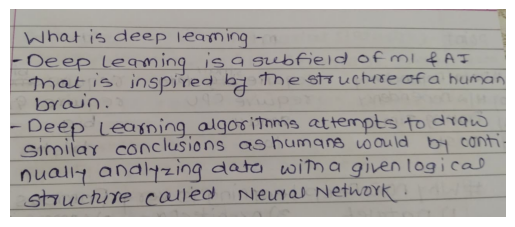

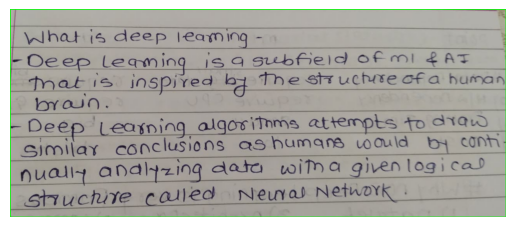

~Oeep Leamin ig Q subfield Of mI LAT |
at 1S inspired b The st uchire cf a human
PSO P A. FeRAM Wspers — weer.
— Deep ‘Leagning atgositnms at tS AD AVAL
Similay canclusions as humans would conn:
Nuaiiy analyzing aater witha given logicad —
Sshuchive called  Neuvad Network .


In [7]:

if image_loaded is None:
    print(f"Error: Unable to read the image file: {img_path}")
else:
    plt.imshow(cv2.cvtColor(image_loaded, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    preprocessed_image = process_image(image_loaded)
    text_boxes = text_regions(preprocessed_image)
    image_with_boxes = mark_text_regions(image_loaded.copy(), text_boxes)

    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    extracted_text = extract_text(image_loaded, text_boxes)
    print(extracted_text)